In [9]:
from dotenv import load_dotenv
import os
from langchain_groq import ChatGroq
load_dotenv()
GROQ_API_KEY=os.environ.get("GROQ_API_KEY")

TRACELOOP_API_KEY= os.environ.get("TRACELOOP_API_KEY")

llm =ChatGroq(model ="llama-3.3-70b-versatile")

# Set inmemory llm cache
from langchain_core.globals import set_llm_cache
from langchain_core.caches import InMemoryCache
set_llm_cache(InMemoryCache())

In [10]:
#!pip install traceloop-sdk

In [11]:
# Reace the project by 
from traceloop.sdk import Traceloop
from traceloop.sdk.decorators import workflow


from traceloop.sdk import Traceloop

Traceloop.init(app_name="Langgraph-Parallel")



Traceloop exporting traces to https://api.traceloop.com authenticating with bearer token



In [12]:
# Define the schema

from pydantic import BaseModel,Field
from typing import TypedDict,Literal

class Evaluation(BaseModel):
    feedback:str = Field(description ="Detailed feedback for eassy")
    score: int = Field(description="Score out of 10",ge=0,le=10)
    AIChecker :Literal["AIGenerate","HumanWritten"]

In [13]:
model=llm.with_structured_output(Evaluation)

In [14]:
eassy="""**The Rise of Agentic AI in the World**

Artificial Intelligence (AI) has become an integral part of our daily lives, transforming the way we work, communicate, and interact with one another. From virtual assistants like Siri and Alexa to self-driving cars and personalized product recommendations, AI is increasingly pervasive in our world. However, a new and more advanced form of AI is emerging, known as Agentic AI. This type of AI is characterized by its autonomy, self-awareness, and decision-making capabilities, which enable it to operate independently and make choices based on data and goals. In this blog, we will explore the rise of Agentic AI, its applications, benefits, challenges, and future implications.

**What is Agentic AI?**

Agentic AI refers to a type of artificial intelligence that possesses autonomy, self-awareness, and decision-making capabilities. Autonomy enables Agentic AI systems to operate independently, without human intervention, and make decisions based on their own goals and objectives. Self-awareness allows these systems to understand their own capabilities and limitations, enabling them to adapt and learn from their experiences. Decision-making capabilities enable Agentic AI systems to make choices based on data and goals, often in real-time.

Examples of Agentic AI systems include autonomous vehicles, personal assistants like Alexa and Google Assistant, and expert systems like IBM Watson Health. These systems are capable of operating independently, making decisions, and learning from their experiences, which enables them to improve their performance over time.

**Applications of Agentic AI**

Agentic AI is being applied in a wide range of industries and domains, including healthcare, finance, transportation, and education. In healthcare, Agentic AI is being used to develop personalized medicine, improve patient care, and conduct medical research. For example, IBM Watson Health is using Agentic AI to analyze medical data and provide personalized treatment recommendations to doctors and patients.

In finance, Agentic AI is being used to manage portfolios, analyze risk, and make trading decisions. For example, hedge funds and investment banks are using Agentic AI to analyze market data and make predictions about future market trends.

In transportation, Agentic AI is being used to develop autonomous vehicles, manage traffic flow, and optimize logistics. For example, Google's Self-Driving Car Project is using Agentic AI to develop autonomous vehicles that can navigate roads and traffic safely and efficiently.

In education, Agentic AI is being used to develop personalized learning systems, adaptive assessments, and intelligent tutoring systems. For example, online learning platforms like Coursera and Udacity are using Agentic AI to provide personalized learning recommendations to students and improve their learning outcomes.

**Benefits of Agentic AI**

The benefits of Agentic AI are numerous and significant. One of the primary benefits is increased efficiency and productivity, as Agentic AI systems can operate independently and make decisions in real-time. This enables businesses and organizations to automate many tasks and processes, freeing up human resources for more strategic and creative work.

Another benefit of Agentic AI is improved accuracy and decision-making. Agentic AI systems can analyze large amounts of data and make predictions and decisions based on that data, often with greater accuracy and speed than humans.

Agentic AI also enables enhanced customer experience and personalization. For example, virtual assistants like Alexa and Google Assistant can provide personalized recommendations and services to customers, based on their preferences and behavior.

Finally, Agentic AI has the potential to bring about significant cost savings and revenue growth. By automating tasks and processes, businesses and organizations can reduce their costs and improve their profitability. Additionally, Agentic AI can enable new business models and revenue streams, such as personalized medicine and autonomous transportation services.

**Challenges and Concerns**

While Agentic AI has many benefits, it also raises several challenges and concerns. One of the primary concerns is job displacement and unemployment, as Agentic AI systems automate many tasks and processes that were previously performed by humans.

Another concern is bias and discrimination in AI decision-making. Agentic AI systems can perpetuate and amplify existing biases and discrimination, if they are trained on biased data or designed with a particular worldview.

Cybersecurity risks and potential AI-powered attacks are also a concern. Agentic AI systems can be vulnerable to cyber attacks, which can compromise their autonomy and decision-making capabilities.

Finally, there are ethical considerations and accountability concerns surrounding Agentic AI. As Agentic AI systems make decisions and take actions, there is a need to ensure that they are aligned with human values and ethics.

**Future of Agentic AI**

The future of Agentic AI is exciting and rapidly evolving. Emerging trends and technologies, such as edge AI and explainable AI, are enabling new applications and innovations. For example, edge AI enables Agentic AI systems to operate at the edge of the network, closer to the data and devices, which can improve their performance and efficiency.

The integration of Agentic AI with other technologies, such as IoT and blockchain, is also enabling new applications and innovations. For example, Agentic AI can be used to analyze data from IoT devices and make predictions and decisions based on that data.

The development of more advanced autonomous systems, such as autonomous vehicles and drones, is also a key area of research and innovation. These systems have the potential to transform industries and domains, such as transportation and logistics.

**Conclusion**

In conclusion, the rise of Agentic AI is transforming the world, bringing about significant benefits and challenges that need to be addressed. As Agentic AI systems become more pervasive and autonomous, there is a need to ensure that they are aligned with human values and ethics. The future of Agentic AI is exciting and rapidly evolving, with emerging trends and technologies enabling new applications and innovations. However, there is also a need for ongoing research and development to address the challenges and concerns surrounding Agentic AI, and to ensure that these technologies are developed and deployed responsibly.
As we move forward in this new era of Agentic AI, it is essential to consider the potential benefits and challenges of these technologies, and to work towards ensuring that they are developed and deployed in a way that benefits humanity as a whole. By doing so, we can unlock the full potential of Agentic AI and create a brighter, more prosperous future for all."""

In [15]:
prompt =f"Evaluate the langugage quality of the following eassy ,provide the feedback and assign the score out of 10 {eassy} "

In [16]:
result=model.invoke(prompt)
result.score

8

In [17]:
#Make the state
from typing import TypedDict
import operator
from typing_extensions import Annotated

class State(TypedDict):
    eassy: str
    languageFeedback:str
    AnalysisFeedback:str
    ClarityFeedback: str
    OverallFeedback :str
    IndividualScore :Annotated[list[int],operator.add]
    AverageScore    :float
    AIChecker :Literal["AIGenerate","HumanWritten"]

In [18]:
#Evaluation of Langugage
@workflow(name="joke_creation")
def Language(state:State) -> State:

    prompt =f"Evaluate the langugage quality of the following eassy ,provide the feedback and assign the score out of 10 {eassy} "

    output =model.invoke(prompt)

    return {"languageFeedback":output.feedback,"IndividualScore":[output.score]}

In [19]:
#Evaluation of Analysis
@workflow(name="joke_creation")
def Analysis(state:State) -> State:

    prompt =f"Evaluate the depth of analysis quality of the following eassy ,provide the feedback and assign the score out of 10 {eassy} "

    output =model.invoke(prompt)

    return {"AnalysisFeedback":output.feedback,"IndividualScore":[output.score]}

In [20]:
#Evaluation of Clarity of thought
@workflow(name="joke_creation")
def Thought(state:State) -> State:

    prompt =f"Evaluate the clarity of Thought quality of the following eassy ,provide the feedback and assign the score out of 10 {eassy} "

    output =model.invoke(prompt)

    return {"ClarityFeedback":output.feedback,"IndividualScore":[output.score]}

In [21]:
@workflow(name="joke_creation")
def Final(state : State) -> State:
    #Summary feedback
    prompt =f"Based on the following feedbacks create the summarized feedback \n language Feedback - {state["languageFeedback"]},\n Depth of Analysis feedback{state['AnalysisFeedback']},\n Clarity of thought feedback {state['ClarityFeedback']} "
    response =llm.invoke(prompt).content

    human =f"Based on the following eassy to check it is human written or AI generated Content \n eassy - {eassy} "

    AI_checker =llm.invoke(human).content


    #Average calculate
    average_score=sum(state["IndividualScore"]) / len(state["IndividualScore"])

    average_score=round(average_score,2)
    #Return the partial state
    return {"OverallFeedback":response,"AIChecker":AI_checker,"AverageScore":average_score}
    

In [22]:
# Build the workflow
from langgraph.graph import StateGraph,START,END
workflow =StateGraph(State)

In [23]:

#Add the Nodes
workflow.add_node("evaluateLanguage",Language)
workflow.add_node("EvaluateAnalysis",Analysis)
workflow.add_node("EvaluateThought",Thought)
workflow.add_node("FinalEvaluation",Final)

# Add the edges
workflow.add_edge(START,"evaluateLanguage")
workflow.add_edge(START,"EvaluateAnalysis")
workflow.add_edge(START, "EvaluateThought")

workflow.add_edge("evaluateLanguage","FinalEvaluation")
workflow.add_edge("EvaluateAnalysis","FinalEvaluation")
workflow.add_edge("EvaluateThought","FinalEvaluation")


workflow.add_edge("FinalEvaluation",END)
#Compile the workflow
graph=workflow.compile()

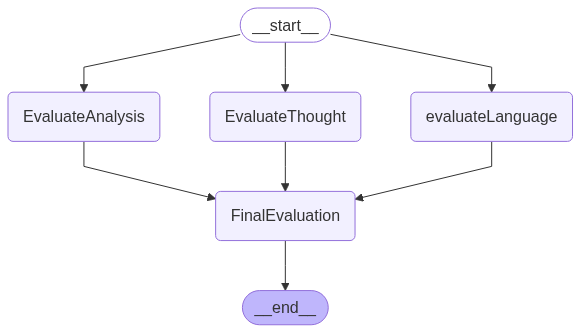

In [24]:
graph

In [25]:
# Excute the graph

initial_state ={"eassy":eassy}

result=graph.invoke(initial_state)

result

{'eassy': "**The Rise of Agentic AI in the World**\n\nArtificial Intelligence (AI) has become an integral part of our daily lives, transforming the way we work, communicate, and interact with one another. From virtual assistants like Siri and Alexa to self-driving cars and personalized product recommendations, AI is increasingly pervasive in our world. However, a new and more advanced form of AI is emerging, known as Agentic AI. This type of AI is characterized by its autonomy, self-awareness, and decision-making capabilities, which enable it to operate independently and make choices based on data and goals. In this blog, we will explore the rise of Agentic AI, its applications, benefits, challenges, and future implications.\n\n**What is Agentic AI?**\n\nAgentic AI refers to a type of artificial intelligence that possesses autonomy, self-awareness, and decision-making capabilities. Autonomy enables Agentic AI systems to operate independently, without human intervention, and make decisi

In [26]:
print(result['OverallFeedback'])

Here is a summarized feedback:

**Overall Strengths:**

* The essay is well-structured and provides a comprehensive overview of Agentic AI, its applications, benefits, and challenges.
* The language is clear and concise, making it easy to understand for a general audience.
* The writer demonstrates a good understanding of the topic and provides relevant examples to support their arguments.

**Areas for Improvement:**

* Provide more specific examples and case studies to illustrate points being made.
* Break up long paragraphs to improve flow and readability.
* Conduct more in-depth analysis and critical thinking to explore complexities and nuances of Agentic AI.
* Improve transitions and sentence structure to avoid disconnected paragraphs and wordy or repetitive sentences.
* Provide more nuanced analysis of challenges and concerns surrounding Agentic AI.
* Edit paragraphs to be more concise and to the point, avoiding lengthiness and repetition.

By addressing these areas, the essay can

In [28]:
print(result['AIChecker'])

After analyzing the essay, I would say that it is likely **AI-generated content**. Here's why:

1. **Overly formal and structured tone**: The essay follows a very formal and structured format, which is typical of AI-generated content. The language is polished, and the transitions between paragraphs are smooth, but it lacks the personality and nuance that a human writer would bring to the text.
2. **Repetitive and formulaic sentence structure**: Many of the sentences follow a similar structure, which is a common trait of AI-generated content. The sentences are often long and convoluted, with multiple clauses, which can make them sound overly formal and artificial.
3. **Overuse of buzzwords and trendy terms**: The essay is filled with buzzwords like "Agentic AI," "autonomy," "self-awareness," and "edge AI," which are currently popular in the tech industry. While these terms are relevant to the topic, their overuse suggests that the author is trying to sound knowledgeable rather than genu